In [2]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np 
import matplotlib.pyplot as plt
from astropy.table import Table

import sys
sys.path.append('./../')
import bindata

In [3]:
# load data
# here the CO and HCN NGC data is taken from the EMPIRE survey; see "EMPIRE: The IRAM 30 m Dense Gas Survey of Nearby Galaxies" (Jiménez-Donaire+ 2019)
table = Table.read('./bindata_data.txt', format='ascii')

In [4]:
#split data in arrays

data1 = table['CO21']
data2 = table['HCN10']

data1_err = table['UC_CO21']
data2_err = table['UC_HCN10']

In [5]:
# [specific to this dataset] remove padding of zeros

id_ = np.where(data1==0)

data1[id_] = np.nan
data2[id_] = np.nan
data1_err[id_] = np.nan
data2_err[id_] = np.nan

id_ = np.where(data2==0)

data1[id_] = np.nan
data2[id_] = np.nan
data1_err[id_] = np.nan
data2_err[id_] = np.nan

# Linear bin plot

Plot of the y-data as a funciton of x-data with linearly spaced x-data bins - nothing fancy

Here we show the significant data points in black (>3sigma), and the insignificant points in grey (<3sigma). These data have been binned within the bin edges shown as maroon bar above the lower axis. The maroon points show the median values of both the x-data and y-data within that bin. The filled maroon points are the bins above a 3sigma significance value, whilst the open points are those below 3sigma. The shaded region shows the +- 1sigma deviation of the population within the bin.  

In [6]:
# determine oversmapling factor
# in this case, for hexagonal pixels (see Cormier et al. 2015)

oversample = 1.13 * (2**2/1**2) 
x, y, stats, binedges = bindata.get_bins_1d(data1, data2, data1_err, data2_err, oversample = oversample, nbins=10)

In [7]:
# determine where data and bins are >3 S/N 

#data
bool_data = (data1/data1_err>3) & (data2/data2_err>3)
id_data_ = np.where(bool_data) 
id_data__ = np.where(~bool_data) 

#bins
bool_bins = stats[0]>3
id_bins_ = np.where(bool_bins) 
id_bins__ = np.where(~bool_bins) 

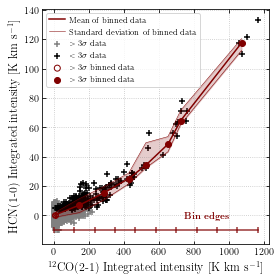

In [10]:
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(1,1,1)

ax.scatter(data1[id_data__], data2[id_data__], c='grey', marker='+', label=r'$>3\sigma$ data')
ax.scatter(data1[id_data_], data2[id_data_], c='black', marker='+', label=r'$<3\sigma$ data')

ax.fill_between(x, stats[1], stats[2], color='maroon', alpha=0.2)
ax.plot(x, y, c='maroon', label=r'Mean of binned data')
ax.plot(x, stats[1], c='maroon', linewidth=0.5, label=r'Standard deviation of binned data')
ax.plot(x, stats[2], c='maroon', linewidth=0.5)

ax.scatter(x[id_bins__], y[id_bins__], edgecolor='maroon', marker='o', c='none', label=r'$>3\sigma$ binned data')
ax.scatter(x[id_bins_], y[id_bins_], edgecolor='maroon', marker='o', c='maroon', label=r'$>3\sigma$ binned data')

binbar_loc = -10
ax.plot(binedges, [binbar_loc] * len(binedges), color = 'maroon', linestyle = '-', alpha = 0.8)
ax.scatter(binedges, [binbar_loc] * len(binedges), color = 'maroon', marker = '|', alpha = 0.8)

ax.text(1e3, -2, r'\bf{Bin edges}', c='maroon', fontsize=9, ha='right')

ax.set_xlabel(r'$^{12}$CO(2-1) Integrated intensity [K km s$^{-1}$]', size=12)
ax.set_ylabel(r'HCN(1-0) Integrated intensity [K km s$^{-1}$]', size=12)

ax.legend(loc='best', handletextpad=0.5, fontsize=8)
ax.grid(linestyle=':', color='grey', alpha=0.5)

fig.tight_layout()
fig.savefig('bindata_plot_linear.pdf', bbox_inches='tight')

# Log bin plot

Plot of the y-data as a funciton of x-data with linearly spaced x-data bins.

Here we show the significant data points in black (>3sigma), and the insignificant points in grey (<3sigma). These data have been binned within the bin edges shown as maroon bar above the lower axis. The maroon points show the median values of both the x-data and y-data within that bin. The filled maroon points are the bins above a 3sigma significance value, whilst the open points are those below 3sigma. The shaded region shows the +- 1sigma deviation of the population within the bin. As the axis are in log, not all the data can be shown, and hence shown above the bin edges are the number of points within each bin that fall below the x-axis (i.e. <0). 

In [11]:
# determine oversmapling factor
# in this case, for hexagonal pixels (see Cormier et al. 2015)

oversample = 1.13 * (2**2/1**2) 
x, y, stats, binedges = bindata.get_bins_1d(data1, data2, data1_err, data2_err, oversample = oversample, nbins=10, logbins=True)

In [12]:
# determine where data and bins are >3 S/N 

#data
bool_data = (data1/data1_err>3) & (data2/data2_err>3)
id_data_ = np.where(bool_data) 
id_data__ = np.where(~bool_data) 

#bins
bool_bins = stats[0]>3
id_bins_ = np.where(bool_bins) 
id_bins__ = np.where(~bool_bins) 

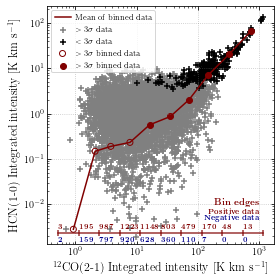

In [13]:
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(1,1,1)

ax.scatter(data1[id_data__], data2[id_data__], c='grey', marker='+', label=r'$>3\sigma$ data')
ax.scatter(data1[id_data_], data2[id_data_], c='black', marker='+', label=r'$<3\sigma$ data')

# ax.fill_between(x, stats[1], stats[2], color='maroon', alpha=0.2)
ax.plot(x, y, c='maroon', label=r'Mean of binned data')

# ax.plot(x, stats[1], c='maroon', linewidth=0.5, label=r'Standard deviation of binned data')
# ax.plot(x, stats[2], c='maroon', linewidth=0.5)

ax.scatter(x[id_bins__], y[id_bins__], edgecolor='maroon', marker='o', c='none', label=r'$>3\sigma$ binned data')
ax.scatter(x[id_bins_], y[id_bins_], edgecolor='maroon', marker='o', c='maroon', label=r'$>3\sigma$ binned data')

binbar_loc = 2.3e-3
ax.plot(binedges, [binbar_loc] * len(binedges), color = 'maroon', linestyle = '-', alpha = 0.8)
ax.scatter(binedges, [binbar_loc] * len(binedges), color = 'maroon', marker = '|', alpha = 0.8)

bintext_loc_neg = 1.5e-3
bintext_loc_pos = 3e-3
for bcent, neg, pos in zip(binedges[:-1], stats[3], stats[4]):
    ax.text(bcent, bintext_loc_neg, r'\bf{%i}' %neg, c='darkblue',fontsize=7,ha='left')
    ax.text(bcent, bintext_loc_pos, r'\bf{%i}' %pos, c='maroon',fontsize=7,ha='left')

ax.text(1e3, 1e-2, r'\bf{Bin edges}', c='maroon', fontsize=9, ha='right')
ax.text(1e3, 6.5e-3, r'\bf{Positive data}' %pos, c='maroon', fontsize=7, ha='right')
ax.text(1e3, 4.5e-3, r'\bf{Negative data}' %pos, c='darkblue', fontsize=7, ha='right')

ax.set_xlabel(r'$^{12}$CO(2-1) Integrated intensity [K km s$^{-1}$]', size=12)
ax.set_ylabel(r'HCN(1-0) Integrated intensity [K km s$^{-1}$]', size=12)

ax.set_xscale('log')
ax.set_yscale('log')

ax.legend(loc='best', handletextpad=0.5, fontsize=8)
ax.grid(linestyle=':', color='grey', alpha=0.5)

fig.tight_layout()
fig.savefig('bindata_plot_log.pdf', bbox_inches='tight')